# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random

# Import API key
#from config import api_key
api_key = 'ffb1d69a14cfa29abf4542290bd2f467'

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/Users/vanjoisscott/Desktop/BootCamp/weather_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#create list of random latitudes and longitudes
cities_df= pd.DataFrame(columns =['City',"Cloudiness","Country","Date","Humidity","Lat","Lng","Max Speed","Wind Speed"])
lat = []
lng = []
for x in range(0,1200):
    lat.append(random.uniform(-90,91))
    lng.append(random.uniform(-181,181))
cities_df['Lat']=lat
cities_df['Lng']=lng
cities_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Speed,Wind Speed
0,NaN,NaN,NaN,NaN,NaN,-67.764779,-60.029461,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,-44.911001,-165.374462,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,-36.634238,57.090827,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,-34.991012,160.396200,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,83.565888,104.205409,NaN,NaN


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

642

In [4]:
cities

['oktyabrskiy',
 'barrow',
 'ancud',
 'ribeira grande',
 'mazagao',
 'bluff',
 'youkounkoun',
 'sehithwa',
 'kaeo',
 'saskylakh',
 'punta arenas',
 'broome',
 'vila velha',
 'kruisfontein',
 'kavaratti',
 'marcona',
 'henties bay',
 'mar del plata',
 'nikolskoye',
 'newport',
 'rikitea',
 'vaini',
 'cherskiy',
 'faanui',
 'khipro',
 'bogo',
 'torbay',
 'ushuaia',
 'cape town',
 'lulea',
 'nantucket',
 'ornskoldsvik',
 'lumphat',
 'lebu',
 'college',
 'mataura',
 'tateyama',
 'busselton',
 'vostok',
 'atuona',
 'bay roberts',
 'baruun-urt',
 'yellowknife',
 'port macquarie',
 'clyde river',
 'pinheiro',
 'tasiilaq',
 'codrington',
 'iwanai',
 'andros town',
 'nishihara',
 'chigorodo',
 'adrar',
 'carnarvon',
 'belushya guba',
 'salalah',
 'hilo',
 'tsihombe',
 'sao joao da barra',
 'bambous virieux',
 'karkaralinsk',
 'fortuna',
 'carutapera',
 'sola',
 'gizo',
 'hithadhoo',
 'taolanaro',
 'llangefni',
 'chuncheng',
 'luderitz',
 'komsomolskiy',
 'hobyo',
 'treviglio',
 'illoqqortoormiu

In [5]:
cities =[]
country = []
for index, row in cities_df.iterrows():
    city=citipy.nearest_city(row['Lat'],row['Lng'])
    cities.append(city.city_name)
    country.append(city.country_code)
cities_df['City']= cities
cities_df['Lat']=lat
cities_df['Country'] = country
cities_df.head()
             

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Speed,Wind Speed
0,ushuaia,NaN,ar,NaN,NaN,-67.764779,-60.029461,NaN,NaN
1,avarua,NaN,ck,NaN,NaN,-44.911001,-165.374462,NaN,NaN
2,saint-joseph,NaN,re,NaN,NaN,-36.634238,57.090827,NaN,NaN
3,port macquarie,NaN,au,NaN,NaN,-34.991012,160.396200,NaN,NaN
4,khatanga,NaN,ru,NaN,NaN,83.565888,104.205409,NaN,NaN


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [37]:
 "# Starting URL for Weather Map API Call\n",
url = "http://api.openweathermap.org/data/2.5/weather?"
    
data_list=[]
    
counter = 1
record = 1
    
print("Beginning Data Retrieval")
for index, row in cities_df.iterrows(): 
        counter +=1
        record = 0
        city = row['City']
        country = row['Country']
        params = {'q': city + ',' + country,
                      'units': 'imperial',
                      'appid': api_key}
    
    
        try:
            response = requests.get(url, params = params)
            weather_json = response.json()
    
    
            data_list.append({'City': city,
                           'Cloudiness': weather_json['clouds']['all'],
                           'Country': country,
                           'Date': weather_json['dt'],
                           'Humidity': weather_json['main']['humidity'],
                           'Lng': weather_json['coord']['lon'],
                           'Lat': weather_json['coord']['lat'],
                           'Max_Temp': weather_json['main']['temp_max'],
                           'Wind_Speed': weather_json['wind']['speed']})

        
            print("------------------------")
            print("Retrieved data for %s, %s" % (city, country))
            
                
        except KeyError:
            print ("location not found")
        pass

Beginning Data Retrieval
------------------------
Retrieved data for ushuaia, ar
------------------------
Retrieved data for avarua, ck
------------------------
Retrieved data for saint-joseph, re
------------------------
Retrieved data for port macquarie, au
------------------------
Retrieved data for khatanga, ru
------------------------
Retrieved data for ushuaia, ar
------------------------
Retrieved data for hobart, au
------------------------
Retrieved data for port elizabeth, za
------------------------
Retrieved data for lebu, cl
------------------------
Retrieved data for neiafu, to
------------------------
Retrieved data for rikitea, pf
------------------------
Retrieved data for freeport, us
------------------------
Retrieved data for cape town, za
location not found
location not found
location not found
------------------------
Retrieved data for rikitea, pf
------------------------
Retrieved data for carnarvon, au
------------------------
Retrieved data for clyde river, ca

------------------------
Retrieved data for esperance, au
location not found
------------------------
Retrieved data for jarocin, pl
------------------------
Retrieved data for leningradskiy, ru
------------------------
Retrieved data for kurmanayevka, ru
location not found
------------------------
Retrieved data for broken hill, au
------------------------
Retrieved data for kavieng, pg
------------------------
Retrieved data for rikitea, pf
------------------------
Retrieved data for new norfolk, au
------------------------
Retrieved data for butaritari, ki
------------------------
Retrieved data for nikolskoye, ru
------------------------
Retrieved data for ostrovnoy, ru
------------------------
Retrieved data for souillac, mu
------------------------
Retrieved data for nuuk, gl
location not found
location not found
------------------------
Retrieved data for vaini, to
location not found
------------------------
Retrieved data for yellowknife, ca
------------------------
Retrieved d

------------------------
Retrieved data for namatanai, pg
------------------------
Retrieved data for hermanus, za
------------------------
Retrieved data for rikitea, pf
------------------------
Retrieved data for mount gambier, au
------------------------
Retrieved data for bodden town, ky
------------------------
Retrieved data for punta arenas, cl
------------------------
Retrieved data for kruisfontein, za
------------------------
Retrieved data for kuloy, ru
------------------------
Retrieved data for srednekolymsk, ru
location not found
------------------------
Retrieved data for new norfolk, au
------------------------
Retrieved data for romny, ua
location not found
------------------------
Retrieved data for kapaa, us
------------------------
Retrieved data for cherskiy, ru
------------------------
Retrieved data for tucurui, br
------------------------
Retrieved data for atuona, pf
location not found
------------------------
Retrieved data for portland, au
-------------------

------------------------
Retrieved data for adrar, dz
------------------------
Retrieved data for sampit, id
------------------------
Retrieved data for zhangjiakou, cn
------------------------
Retrieved data for ushuaia, ar
------------------------
Retrieved data for broken hill, au
------------------------
Retrieved data for beringovskiy, ru
------------------------
Retrieved data for jamestown, sh
------------------------
Retrieved data for rikitea, pf
------------------------
Retrieved data for rikitea, pf
------------------------
Retrieved data for arraial do cabo, br
------------------------
Retrieved data for petatlan, mx
------------------------
Retrieved data for jamestown, sh
------------------------
Retrieved data for port alfred, za
------------------------
Retrieved data for kavaratti, in
------------------------
Retrieved data for baculin, ph
------------------------
Retrieved data for saint-philippe, re
------------------------
Retrieved data for khatanga, ru
-----------

------------------------
Retrieved data for longyearbyen, sj
location not found
------------------------
Retrieved data for chanute, us
------------------------
Retrieved data for hurricane, us
------------------------
Retrieved data for punta arenas, cl
------------------------
Retrieved data for biak, id
------------------------
Retrieved data for poum, nc
------------------------
Retrieved data for albany, au
------------------------
Retrieved data for atuona, pf
location not found
------------------------
Retrieved data for vaini, to
location not found
location not found
------------------------
Retrieved data for vestmannaeyjar, is
------------------------
Retrieved data for new norfolk, au
------------------------
Retrieved data for lavrentiya, ru
------------------------
Retrieved data for ouesso, cg
------------------------
Retrieved data for hilo, us
------------------------
Retrieved data for avarua, ck
------------------------
Retrieved data for jamestown, sh
---------------

------------------------
Retrieved data for svetlogorsk, ru
------------------------
Retrieved data for kapaa, us
------------------------
Retrieved data for thompson, ca
------------------------
Retrieved data for nome, us
------------------------
Retrieved data for butaritari, ki
------------------------
Retrieved data for ushuaia, ar
------------------------
Retrieved data for cape coast, gh
location not found
------------------------
Retrieved data for sao jose da coroa grande, br
location not found
------------------------
Retrieved data for murgab, tm
------------------------
Retrieved data for roma, au
------------------------
Retrieved data for bjornevatn, no
------------------------
Retrieved data for lorengau, pg
------------------------
Retrieved data for kimbe, pg
------------------------
Retrieved data for del rio, us
------------------------
Retrieved data for sao jose da coroa grande, br
------------------------
Retrieved data for georgetown, sh
------------------------


location not found
------------------------
Retrieved data for east london, za
------------------------
Retrieved data for butaritari, ki
location not found
------------------------
Retrieved data for riacho de santana, br
------------------------
Retrieved data for bluff, nz
------------------------
Retrieved data for high rock, bs
------------------------
Retrieved data for hobart, au
------------------------
Retrieved data for hithadhoo, mv
------------------------
Retrieved data for port alfred, za
------------------------
Retrieved data for dingle, ie
------------------------
Retrieved data for lexington park, us
------------------------
Retrieved data for qaanaaq, gl
------------------------
Retrieved data for padang, id
------------------------
Retrieved data for high level, ca
------------------------
Retrieved data for ancud, cl
------------------------
Retrieved data for mar del plata, ar
------------------------
Retrieved data for ushuaia, ar
------------------------
Retriev

------------------------
Retrieved data for port elizabeth, za
------------------------
Retrieved data for portobelo, pa
------------------------
Retrieved data for busselton, au
------------------------
Retrieved data for teguldet, ru
------------------------
Retrieved data for mahebourg, mu
------------------------
Retrieved data for dalupaon, ph
------------------------
Retrieved data for puerto ayora, ec
------------------------
Retrieved data for jamestown, sh
location not found
------------------------
Retrieved data for baft, ir
------------------------
Retrieved data for albany, au
location not found
------------------------
Retrieved data for caravelas, br
------------------------
Retrieved data for vaini, to
------------------------
Retrieved data for meulaboh, id
------------------------
Retrieved data for ketchikan, us
------------------------
Retrieved data for punta arenas, cl
------------------------
Retrieved data for barrow, us
------------------------
Retrieved data f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [38]:
 # Convert array of JSONs into Pandas DataFrame
data_list_df = pd.DataFrame(data_list)

# Show Record Count
data_list_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,ushuaia,75,ar,1559168080,75,-54.81,-68.31,41.00,31.09
1,avarua,49,ck,1559168080,65,-21.21,-159.78,78.80,16.11
2,saint-joseph,75,re,1559168080,60,-21.37,55.62,72.00,4.70
3,port macquarie,20,au,1559167836,66,-31.43,152.91,57.99,5.82
4,khatanga,1,ru,1559168086,86,71.98,102.47,36.80,14.88


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

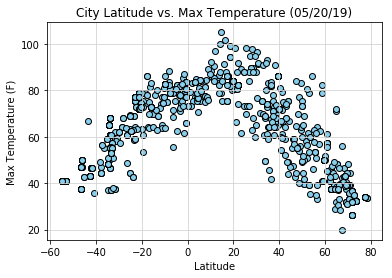

In [40]:
plt.scatter(data_list_df['Lat'], data_list_df['Max_Temp'], edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (05/20/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

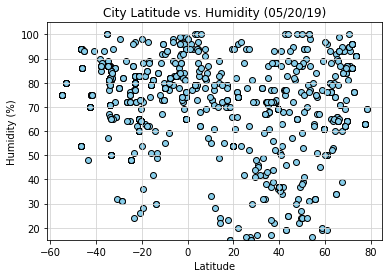

In [41]:
plt.scatter(data_list_df["Lat"],data_list_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (05/20/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Humid.png")
plt.show()

#### Latitude vs. Cloudiness Plot

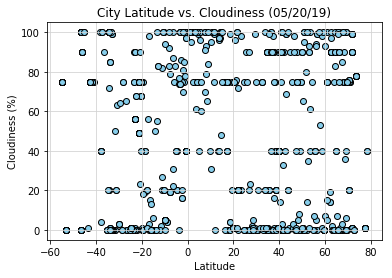

In [42]:
plt.scatter(data_list_df["Lat"],data_list_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (05/20/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

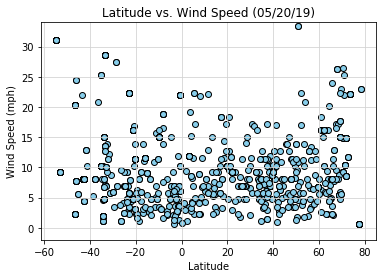

In [44]:

plt.scatter(data_list_df["Lat"],data_list_df["Wind_Speed"],edgecolors="black",facecolors="skyblue")
plt.title("Latitude vs. Wind Speed (05/20/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Wind.png")
plt.show()
